In [2]:
import pandas as pd

import matplotlib.pyplot as plt

In [17]:
data_without_gc = pd.read_csv('..\\logging\\tb_logs_rnn_data_without_global_context_version_1.csv')
data_with_gc = pd.read_csv('..\\logging\\tb_logs_rnn_data_with_global_context_version_1.csv')

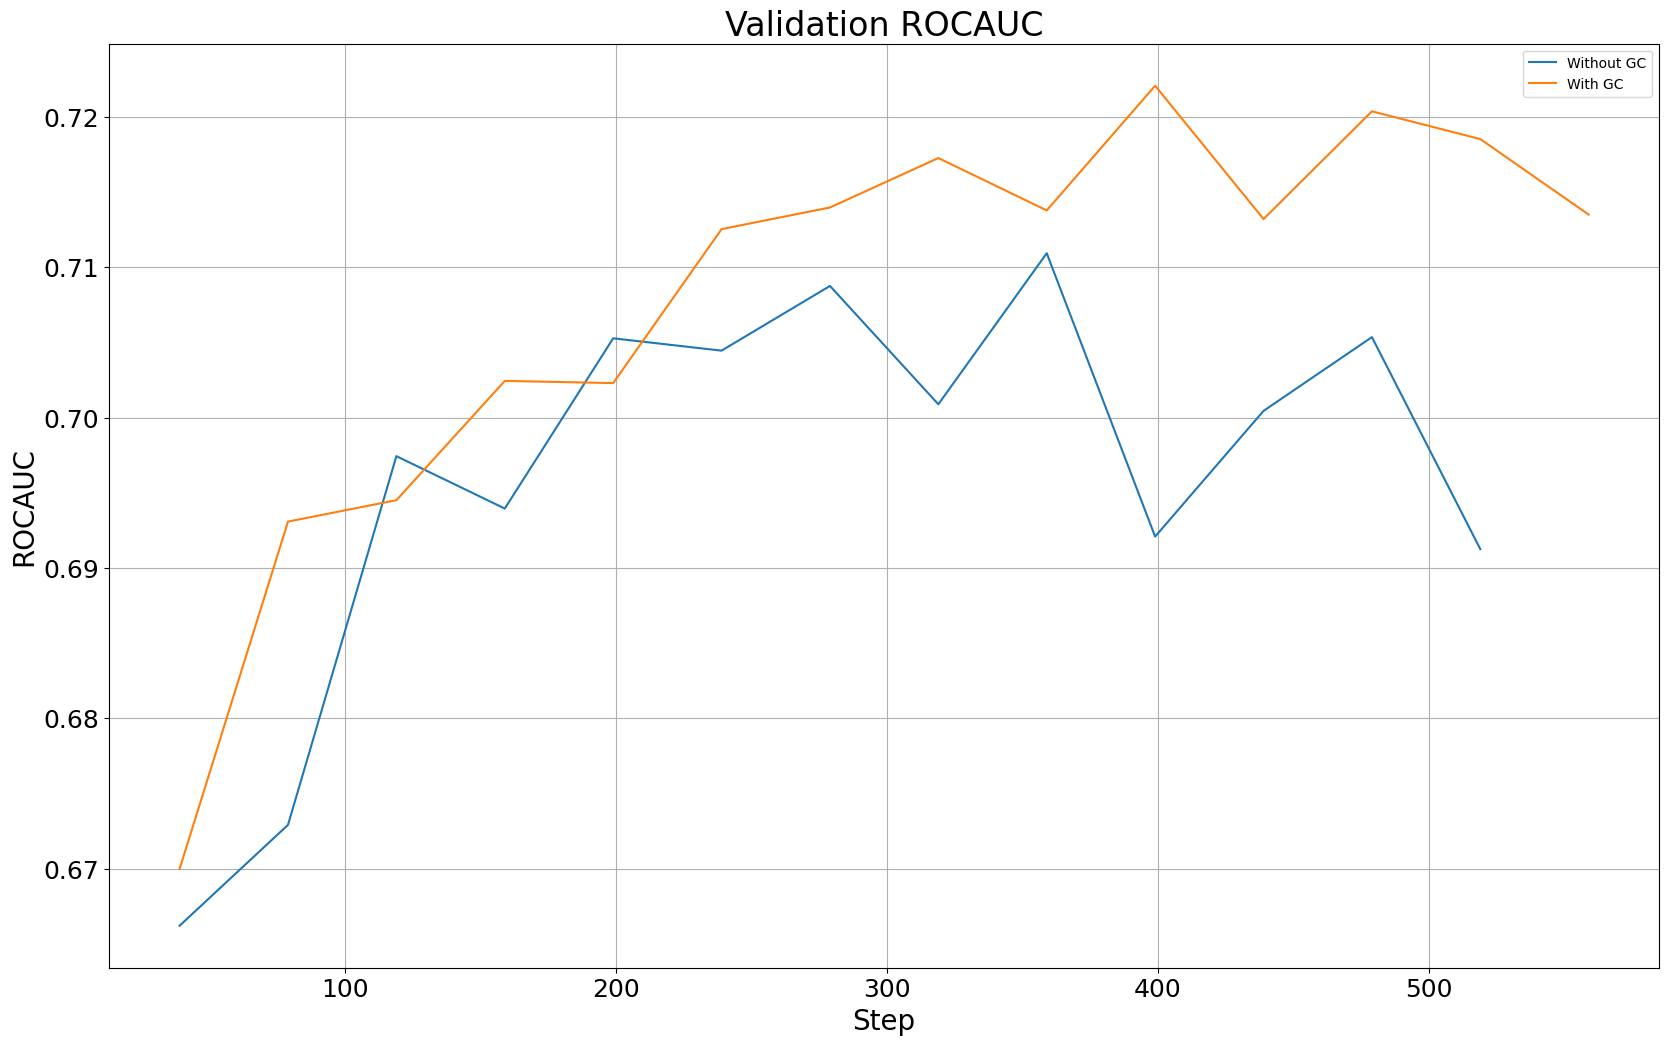

In [19]:
plt.figure(figsize=(20, 12), dpi=100)
plt.plot(data_without_gc['Step'], data_without_gc['Value'], label='Without GC')
plt.plot(data_with_gc['Step'], data_with_gc['Value'], label='With GC')
plt.grid(True)

plt.title('Validation ROCAUC', size=24)

plt.xlabel('Step', size=20)
plt.ylabel('ROCAUC', size=20)

plt.xticks(size=18)
plt.yticks(size=18)

plt.legend();

In [100]:
import comet_ml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


with open('../api_token.txt') as f:
        api_token = f.read()

api = comet_ml.api.API(api_token)

In [89]:
def group_by_metrics(all_experiments, metric_name='val_aucroc'):

    group_metrics = dict()

    for experiment in all_experiments:

        exp_name = experiment.name
        group_exp_name = exp_name[:-2]

        list_group_logs = group_metrics.get(group_exp_name, [])

        if len(list_group_logs) == 5:
            continue
        list_group_logs.append(experiment.get_metrics_summary(metric_name)['valueMax'])
        group_metrics[group_exp_name] = list_group_logs

    return group_metrics


def visualize_metrics():
    pass

all_experiments = api.get('nokiroki1', 'nlp-transactions')
group_metrics = group_by_metrics(all_experiments, metric_name='val_auroc')

In [110]:
df_experiments = pd.DataFrame(group_metrics).T.reset_index()
df_experiments.rename(columns={'index': 'exp_name'}, inplace=True)

df_experiments = pd.melt(df_experiments, id_vars='exp_name', var_name='run', value_name='metric')
df_experiments.head()

df_experiments['run'] = df_experiments['run'].astype(int)
df_experiments['metric'] = df_experiments['metric'].astype(float)

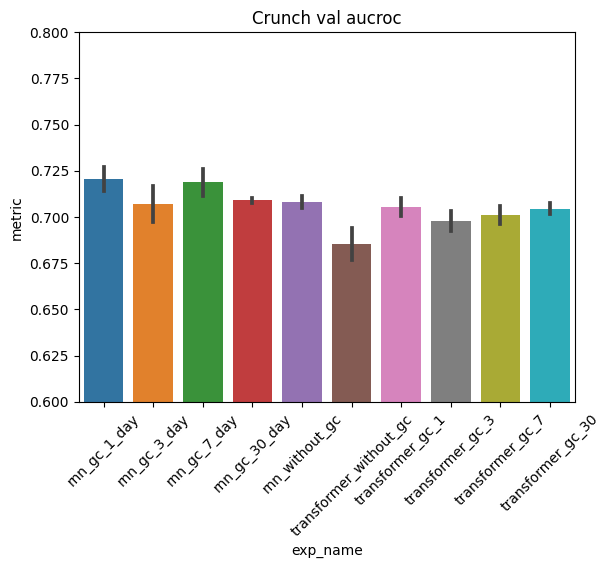

In [117]:
sns.barplot(data=df_experiments, x='exp_name', y='metric', errorbar="sd")

plt.title('Crunch val aucroc')
plt.ylim(0.6, 0.8)
plt.xticks(rotation=45)
plt.show()